# Player Behavior and Retention Analysis

## Project Overview

This project analyzes the behavior of players in online gaming envrioments using the **Predict Online Gaming Behavior Dataset**.

The goal is to explore player engagement patterns, identify factors influencing retention, and predict player engagement levels.
 
 ## Key Objectives:
- Perform **Exploratory Data Analysis (EDA)** to identify trends and patterns in player behavior.
- Build predictive models to classify **player engagement levels** based on various features.
- Provide insights and recommendations for improving player retention and game design.

In [1]:
import pandas as pd

df = pd.read_csv('../input/predict-online-gaming-behavior-dataset/online_gaming_behavior_dataset.csv')

df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [2]:
# Lets get basic information about the dataset.

print("\nBasic Information")
df.info()

# Lets check for missing values
print("\nMissing Values")
df.isnull().sum()

# Lets get descriptive statistics.
print("\nDescriptive Statistics")
df.describe()


Basic Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), ob

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


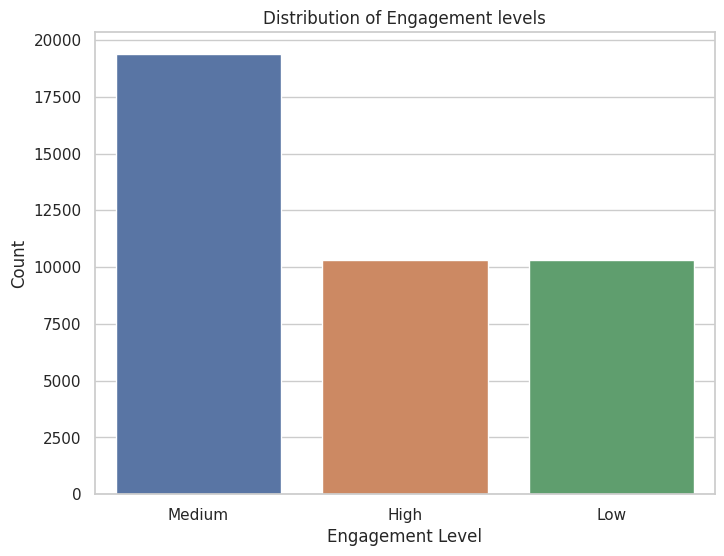

In [3]:
# Lets import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Lets set the plot style
sns.set(style='whitegrid')

# Lets look plot distribution of EngagementLevel
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='EngagementLevel')
plt.title('Distribution of Engagement levels')
plt.xlabel('Engagement Level')
plt.ylabel('Count')
plt.show()


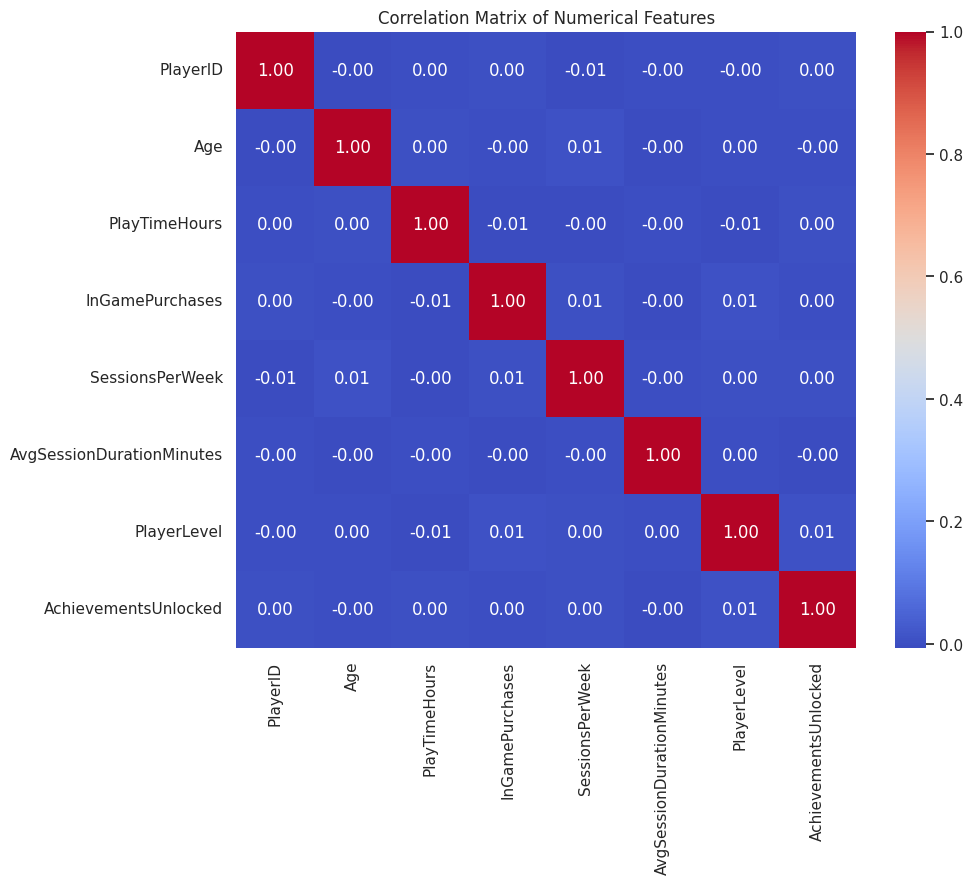

In [4]:
# Lets filter numerical columns only
numeric_df = df.select_dtypes(include=['float64','int64'])

# Lets look correlation matrix
plt.figure(figsize=(10, 8))
corr = numeric_df.corr()

# Lets create heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

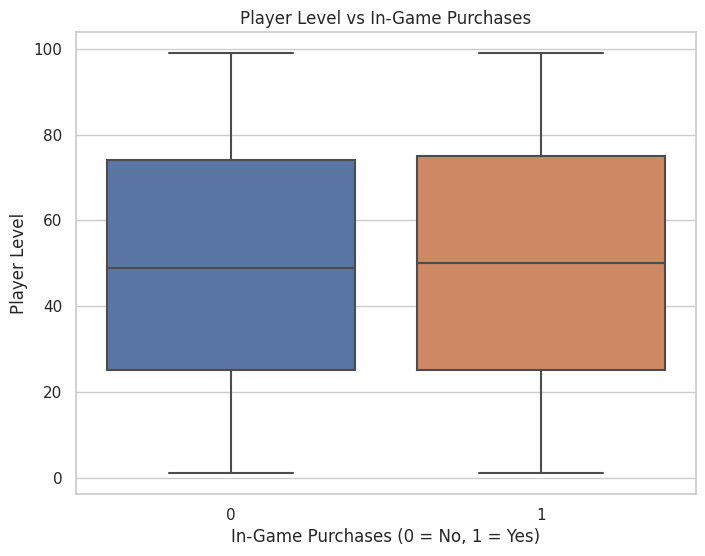

In [5]:
# Lets find plot relationship between in-game purchases and player level
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='InGamePurchases', y='PlayerLevel')
plt.title('Player Level vs In-Game Purchases')
plt.xlabel('In-Game Purchases (0 = No, 1 = Yes)')
plt.ylabel('Player Level')
plt.show

In [6]:
# Exploration phase is done! Lets move on to feature engineering and modeling. 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Lets encode categorical columns
label_encoder = LabelEncoder()

# Encode Gender
df['Gender'] = label_encoder.fit_transform(df['Gender'])
# Encode GameGenre
df['GameGenre'] = label_encoder.fit_transform(df['GameGenre'])
# Encode Location
df['Location'] = label_encoder.fit_transform(df['Location'])
# Encode GameDifficulty
df['GameDifficulty'] = label_encoder.fit_transform(df['GameDifficulty'])

# Lets define features (X) and target (y)
X = df.drop('EngagementLevel', axis=1)
y = df['EngagementLevel']

# Lets encode the target variable (EngagementLevel)
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets (%80 train, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lets display the shapes of the training and testing sets.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32027, 12), (8007, 12), (32027,), (8007,))

In [7]:
# Lets build a Random Forest Classifier to predict player engagement levels.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Lets initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Lets train the model on the training data
rf_model.fit(X_train, y_train)

# Lets predict engagement levels on the test set
y_pred = rf_model.predict(X_test)

# Lets calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Lets print the accuracy and classification report
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))

Accuracy: 90.97%
              precision    recall  f1-score   support

           0       0.92      0.87      0.90      2035
           1       0.91      0.88      0.89      2093
           2       0.90      0.95      0.93      3879

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.90      8007
weighted avg       0.91      0.91      0.91      8007



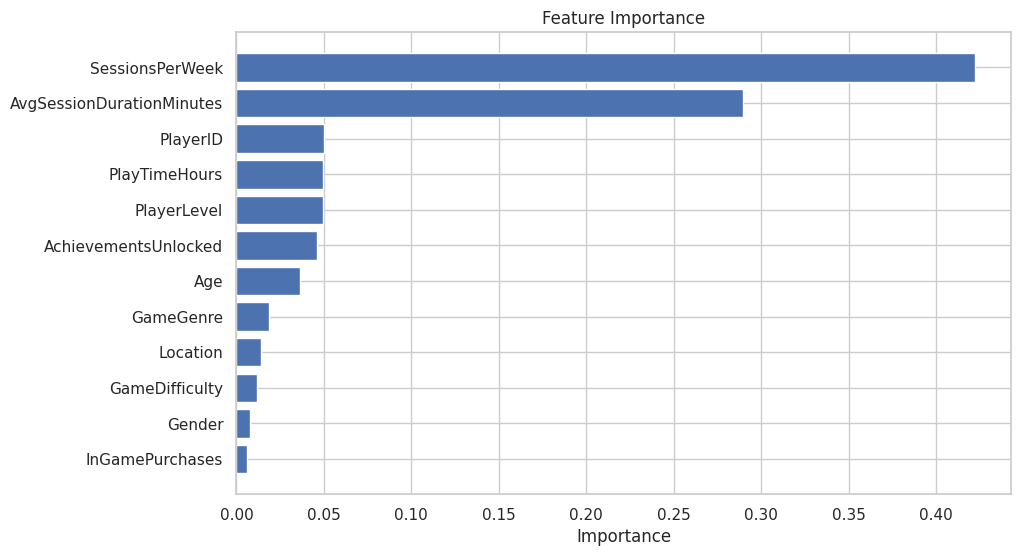

In [8]:
# Lets build feature importance
importances = rf_model.feature_importances_
features = X.columns

# Lets sort features by importance
sorted_indices = importances.argsort()

# Lets build plot feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [features[i] for i in sorted_indices])
plt.xlabel('Importance')
plt.show()